# Programming for Data Analytics Project 1

### Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 1. Importing data

In [92]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df

id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  formerly smoked   
1     Self-employed          Rural             202.21   NaN     never smoked   
2           Private          Rural             105.92  32.5     never smoked   
3           Private          Urban             171.23  34.4           smokes   
4     Self-employed          Rural             174.12  24.0     never smoked   
...             ...            ...                ...   ...              ...   
5105        Private          Urban              83.75   NaN     never smoked   
5106  Self-employed          Urban             125.20  40.0     never smoked   
5107  Self-employed          Rural              82.99  30.6     never smoked   
5108        Private          Rural             166.29  25.6  formerly smoked   
5109       Govt_job          Urban              85.28  26.2          Unknown   

      stroke  
0          1  
1          1  
2          1  
3          1  
4          1  
...      ...  
5105       0  
5106       0  
5107       0  
5108       0  
5109       0  

[5110 rows x 12 columns]

### 1.1 Exploring the data

In [93]:
df.shape

(5110, 12)

This dataset has 5110 rows and 12 columns, it is a 2 dimensional array in Numpy terms.

In [94]:
# Counting the number of people who suffered stroke (1) and who didn't (0)
df["stroke"].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [95]:
# verview of the dataset for variable count and datatypes:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In this dataset there are 12 columns, the first of which is and int64 datatype for "id", which does not have any infomration content for this analysis, therefore can be considered insignificant.
There is a mix of datatypes in the columns/variable some are deemed numerical (int64, float64), others are categorical objects.
Columns "gender", "ever_married", "work type", "Residence_type" and "smoking_status" are identified as categorical data, which can be converted into numerical datatypes.

In [96]:
# Dropping the "id" column as it is irrelevant
df.drop(["id"], axis = 1, inplace=True)

# Showing the dataset w/o "id"
df.head()

gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1  Female  61.0             0              0          Yes  Self-employed   
2    Male  80.0             0              1          Yes        Private   
3  Female  49.0             0              0          Yes        Private   
4  Female  79.0             1              0          Yes  Self-employed   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban             228.69  36.6  formerly smoked       1  
1          Rural             202.21   NaN     never smoked       1  
2          Rural             105.92  32.5     never smoked       1  
3          Urban             171.23  34.4           smokes       1  
4          Rural             174.12  24.0     never smoked       1

In [97]:
# Statistical summary of numerical data:
df.describe()

age  hypertension  heart_disease  avg_glucose_level  \
count  5110.000000   5110.000000    5110.000000        5110.000000   
mean     43.226614      0.097456       0.054012         106.147677   
std      22.612647      0.296607       0.226063          45.283560   
min       0.080000      0.000000       0.000000          55.120000   
25%      25.000000      0.000000       0.000000          77.245000   
50%      45.000000      0.000000       0.000000          91.885000   
75%      61.000000      0.000000       0.000000         114.090000   
max      82.000000      1.000000       1.000000         271.740000   

               bmi       stroke  
count  4909.000000  5110.000000  
mean     28.893237     0.048728  
std       7.854067     0.215320  
min      10.300000     0.000000  
25%      23.500000     0.000000  
50%      28.100000     0.000000  
75%      33.100000     0.000000  
max      97.600000     1.000000

The DataFrame.describe() command is meant to provide a statistical summary of all numerical data. 

The "bmi" column only includes 4909 datapoints, as opposed to all other columns with 5110 datapoints.
On review of empty/missing data the same can be confirmed by using the isna().sum or isnull().sum() methods.


In [98]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [99]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

There are 201 null/na values within the "bmi" column. 
This is a significant number of lines and I would not suggest to have them dropped out of the dataset. It is possible to fill those blanks with the mean of all values in the bmi column.

In [45]:
# Reviewing the statistical summary of the "bmi" column.
df.bmi.describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

<AxesSubplot:>

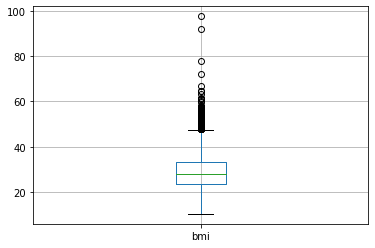

In [46]:
df.boxplot(column=["bmi"])

The boxplot helps to visualize the characteristics of the "bmi" variable. The average bmi value is a $ \mu $ = 28.89 and its standard deviation is $ \sigma $ = 7.85. However, there are a significant number of outliers beyond the bmi value of 33.10 up til 97.60. This suggests that the probability distribution of the body mass index may not be normally distributed. 

In [102]:
# Filling the missing values with the mean of the bmi column:
df.fillna(df["bmi"].mean(), inplace=True)

In [103]:
# Reviewing the updated state of the bmi column.
df.bmi.describe()

count    5110.000000
mean       28.893237
std         7.698018
min        10.300000
25%        23.800000
50%        28.400000
75%        32.800000
max        97.600000
Name: bmi, dtype: float64

In [104]:
# Review again the dataframe for missing values:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

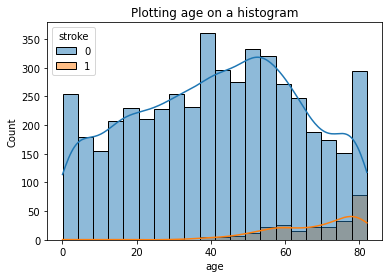

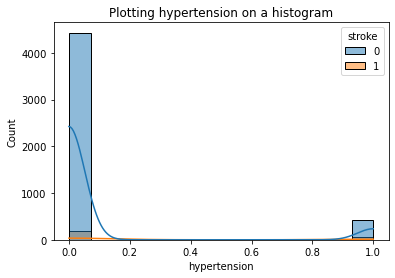

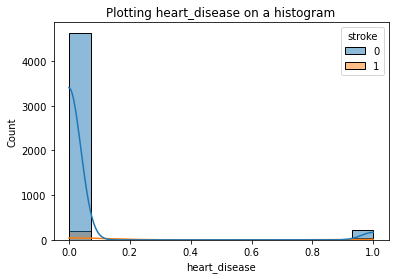

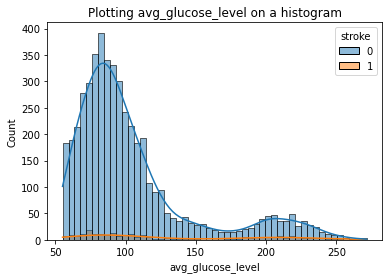

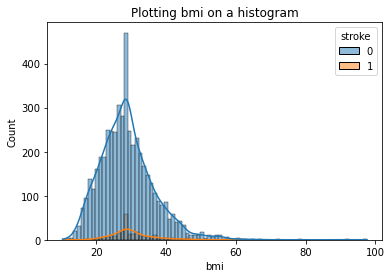

In [125]:
# Importing Seaborn for visualization
import seaborn as sns

# Plot each numerical variable on historgrams to drwa conclusion on the type of distribution:

for i in df.columns[1:-1]: # excluding the last column "stroke"
    if (df[i].dtype == "int64") or (df[i].dtype =="float64"):
        sns.histplot(data=df, x=i, kde=True, hue = df["stroke"])
        plt.title("Plotting {} on a histogram".format(i))
        plt.show()

Distribution of the datapoints vary significantly with bmi and avg_glucose_level more trending towards a lognormal distribution and age more towards a uniform distibution.

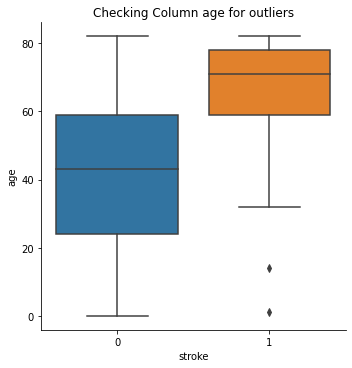

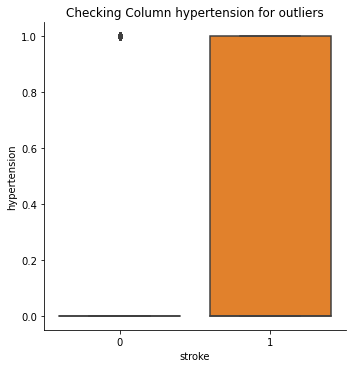

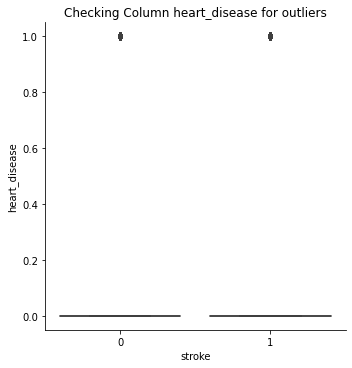

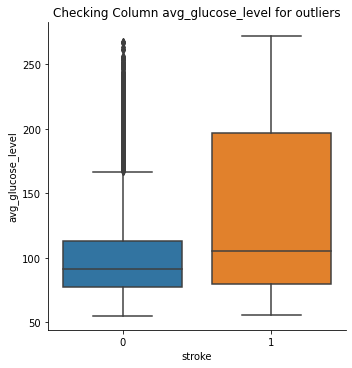

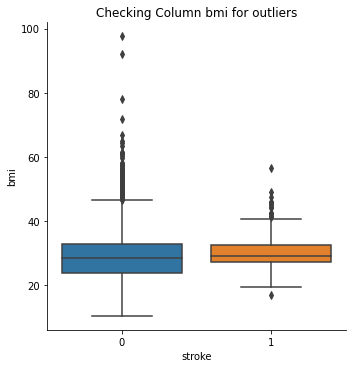

In [139]:
# Plotting numerical variable to check for outliers:

for i in df.columns[:-1]:
    if (df[i].dtype == "int64") or (df[i].dtype =="float64"):
        sns.catplot(data=df, x = "stroke", y = i, kind = "box")
        plt.title("Checking Column {} for outliers".format(i))
        plt.show()


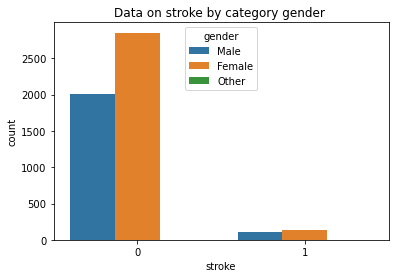

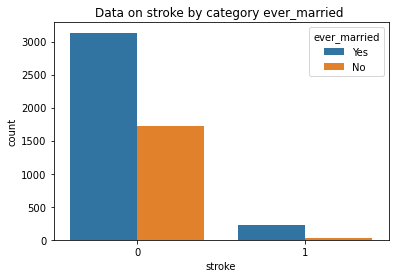

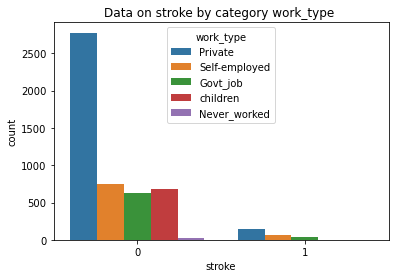

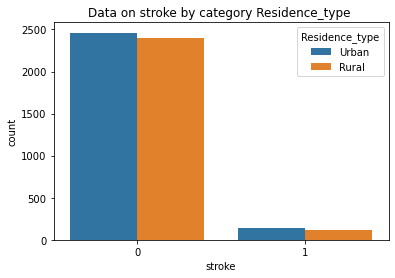

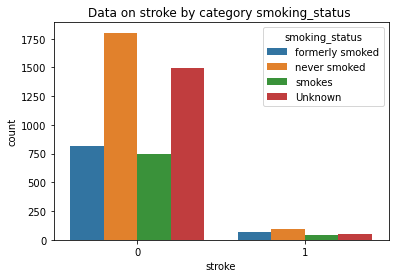

In [142]:
# Visualization of cases of stroke(1) vs no stroke (0) against categorical data: 

for i in df.columns[:]:
    if df[i].dtype == "object":
        sns.countplot(data = df, x = 'stroke', hue = i)
        
        plt.title("Data on stroke by category {} ".format(i))
        plt.show()

Barcharts show that the categorical variables do not significantly contribute/influence the occurrance of a stroke by themselves.

In [59]:
# Checking for correlation across the numerical variables
df.corr()

age  hypertension  heart_disease  avg_glucose_level  \
age                1.000000      0.276398       0.263796           0.238171   
hypertension       0.276398      1.000000       0.108306           0.174474   
heart_disease      0.263796      0.108306       1.000000           0.161857   
avg_glucose_level  0.238171      0.174474       0.161857           1.000000   
bmi                0.325942      0.160189       0.038899           0.168751   
stroke             0.245257      0.127904       0.134914           0.131945   

                        bmi    stroke  
age                0.325942  0.245257  
hypertension       0.160189  0.127904  
heart_disease      0.038899  0.134914  
avg_glucose_level  0.168751  0.131945  
bmi                1.000000  0.038947  
stroke             0.038947  1.000000

<AxesSubplot:>

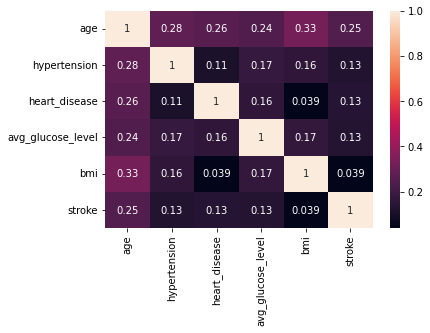

In [118]:
sns.heatmap(df.corr(), annot = True)

There is weak relationship between the occurrances of stroke and the included numerical variables in this dataset. Strong relationships are considered when the values are beyond the 0.8 mark, close to 1.0.

## II. Preprocessing

### Encoding
#### *Changing categorical values/features to integers*

In [162]:
from sklearn.preprocessing import OneHotEncoder
one_hot_enc = OneHotEncoder(handle_unknown = "error")
X = df[["gender", "ever_married", "work_type", "Residence_type", "smoking_status"]]
temp_df= one_hot_enc.fit_transform(X).toarray()
temp_df

array([[0., 1., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [163]:
one_hot_enc.categories_

[array(['Female', 'Male', 'Other'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['Govt_job', 'Never_worked', 'Private', 'Self-employed', 'children'],
       dtype=object),
 array(['Rural', 'Urban'], dtype=object),
 array(['Unknown', 'formerly smoked', 'never smoked', 'smokes'],
       dtype=object)]

In [169]:
# Create new dataframe with the new columns
encoded_df = pd.DataFrame(columns = one_hot_enc.get_feature_names_out(), data=temp_df)
encoded_df = encoded_df.astype(int)
encoded_df

gender_Female  gender_Male  gender_Other  ever_married_No  \
0                 0            1             0                0   
1                 1            0             0                0   
2                 0            1             0                0   
3                 1            0             0                0   
4                 1            0             0                0   
...             ...          ...           ...              ...   
5105              1            0             0                0   
5106              1            0             0                0   
5107              1            0             0                0   
5108              0            1             0                0   
5109              1            0             0                0   

      ever_married_Yes  work_type_Govt_job  work_type_Never_worked  \
0                    1                   0                       0   
1                    1                   0                       0   
2                    1                   0                       0   
3                    1                   0                       0   
4                    1                   0                       0   
...                ...                 ...                     ...   
5105                 1                   0                       0   
5106                 1                   0                       0   
5107                 1                   0                       0   
5108                 1                   0                       0   
5109                 1                   1                       0   

      work_type_Private  work_type_Self-employed  work_type_children  \
0                     1                        0                   0   
1                     0                        1                   0   
2                     1                        0                   0   
3                     1                        0                   0   
4                     0                        1                   0   
...                 ...                      ...                 ...   
5105                  1                        0                   0   
5106                  0                        1                   0   
5107                  0                        1                   0   
5108                  1                        0                   0   
5109                  0                        0                   0   

      Residence_type_Rural  Residence_type_Urban  smoking_status_Unknown  \
0                        0                     1                       0   
1                        1                     0                       0   
2                        1                     0                       0   
3                        0                     1                       0   
4                        1                     0                       0   
...                    ...                   ...                     ...   
5105                     0                     1                       0   
5106                     0                     1                       0   
5107                     1                     0                       0   
5108                     1                     0                       0   
5109                     0                     1                       1   

      smoking_status_formerly smoked  smoking_status_never smoked  \
0                                  1                            0   
1                                  0                            1   
2                                  0                            1   
3                                  0                            0   
4                                  0                            1   
...                              ...                          ...   
5105                               0                            1   
5106                          

In [171]:
# Merging the two dataframes into one:

df = pd.concat([df, encoded_df], axis = 1)
df

gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  67.0             0              1          Yes        Private   
1     Female  61.0             0              0          Yes  Self-employed   
2       Male  80.0             0              1          Yes        Private   
3     Female  49.0             0              0          Yes        Private   
4     Female  79.0             1              0          Yes  Self-employed   
...      ...   ...           ...            ...          ...            ...   
5105  Female  80.0             1              0          Yes        Private   
5106  Female  81.0             0              0          Yes  Self-employed   
5107  Female  35.0             0              0          Yes  Self-employed   
5108    Male  51.0             0              0          Yes        Private   
5109  Female  44.0             0              0          Yes       Govt_job   

     Residence_type  avg_glucose_level        bmi   smoking_status  ...  \
0             Urban             228.69  36.600000  formerly smoked  ...   
1             Rural             202.21  28.893237     never smoked  ...   
2             Rural             105.92  32.500000     never smoked  ...   
3             Urban             171.23  34.400000           smokes  ...   
4             Rural             174.12  24.000000     never smoked  ...   
...             ...                ...        ...              ...  ...   
5105          Urban              83.75  28.893237     never smoked  ...   
5106          Urban             125.20  40.000000     never smoked  ...   
5107          Rural              82.99  30.600000     never smoked  ...   
5108          Rural             166.29  25.600000  formerly smoked  ...   
5109          Urban              85.28  26.200000          Unknown  ...   

      work_type_Never_worked  work_type_Private  work_type_Self-employed  \
0                          0                  1                        0   
1                          0                  0                        1   
2                          0                  1                        0   
3                          0                  1                        0   
4                          0                  0                        1   
...                      ...                ...                      ...   
5105                       0                  1                        0   
5106                       0                  0                        1   
5107                       0                  0                        1   
5108                       0                  1                        0   
5109                       0                  0                        0   

      work_type_children  Residence_type_Rural  Residence_type_Urban  \
0                      0                     0                     1   
1                      0                     1                     0   
2                      0                     1                     0   
3                      0                     0                     1   
4                      0                     1                     0   
...                  ...                   ...                   ...   
5105                   0                     0                     1   
5106                   0                     0                     1   
5107                   0                     1                     0   
5108                   0                     1                     0   
5109                   0                     0                     1   

      smoking_status_Unknown  smoking_status_formerly smoked  \
0                          0                               1   
1                          0                               0   
2                          0                               0   
3                          0                               0   
4                          0                              

In [193]:
display(df[df["age"] < 20])

age  hypertension  heart_disease  avg_glucose_level        bmi  \
162    1.32             0              0              70.37  28.893237   
245   14.00             0              0              57.93  30.900000   
249    3.00             0              0              95.12  18.000000   
251    8.00             0              0             110.89  17.600000   
253   14.00             0              0             161.28  19.100000   
...     ...           ...            ...                ...        ...   
5094  13.00             0              0              82.38  24.300000   
5095   1.08             0              0              79.15  17.400000   
5098   9.00             0              0              71.88  17.500000   
5103  18.00             0              0              82.85  46.900000   
5104  13.00             0              0             103.08  18.600000   

      stroke  x0_Residence_type  x0_ever_married  x0_gender  \
162        1                NaN              NaN        NaN   
245        1                NaN              NaN        NaN   
249        0                NaN              NaN        NaN   
251        0                NaN              NaN        NaN   
253        0                NaN              NaN        NaN   
...      ...                ...              ...        ...   
5094       0                NaN              NaN        NaN   
5095       0                NaN              NaN        NaN   
5098       0                NaN              NaN        NaN   
5103       0                NaN              NaN        NaN   
5104       0                NaN              NaN        NaN   

      x0_smoking_status  ...  work_type_Never_worked  work_type_Private  \
162                 NaN  ...                       0                  0   
245                 NaN  ...                       0                  0   
249                 NaN  ...                       0                  0   
251                 NaN  ...                       0                  1   
253                 NaN  ...                       1                  0   
...                 ...  ...                     ...                ...   
5094                NaN  ...                       0                  0   
5095                NaN  ...                       0                  0   
5098                NaN  ...                       0                  0   
5103                NaN  ...                       0                  1   
5104                NaN  ...                       0                  0   

      work_type_Self-employed  work_type_children  Residence_type_Rural  \
162                         0                   1                     0   
245                         0                   1                     1   
249                         0                   1                     1   
251                         0                   0                     0   
253                         0                   0                     1   
...                       ...                 ...                   ...   
5094                        0                   1                     0   
5095                        0                   1                     1   
5098                        0                   1                     0   
5103                        0                   0                     0   
5104                        0                   1                     1   

      Residence_type_Urban  smoking_status_Unknown  \
162                      1                       1   
245                      0                       1   
249                      0                       1   
251                      1                       1   
253                      0                       1   
...                    ...                     ...   
5094                     1                       1   
5095                     0                       1   
5098                     1                       1   
5103                

## III. 